## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 3.7 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 4.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 3.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------ --------- 1.0/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.wh

In [2]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [55]:
# 구글 주식 데이터 로딩
goog = yf.download("CME", start="2002-01-01", end="2025-5-11")
goog.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CME,CME,CME,CME,CME
Date,,,,,
2002-12-06,4.266289,4.296123,3.868500,3.878444,27551000
2002-12-09,4.178777,4.256346,4.091263,4.246401,3149500
2002-12-10,4.251371,4.306067,4.141979,4.181758,1723000
2002-12-11,4.481098,4.524855,4.206623,4.246402,2549000
2002-12-12,4.366732,4.481096,4.335903,4.481096,1355500


In [56]:
# [+] 종가(Close) 데이터만 사용하기
goog = goog['Close']
goog

Ticker,CME
Date,
2002-12-06,4.266289
2002-12-09,4.178777
2002-12-10,4.251371
2002-12-11,4.481098
2002-12-12,4.366732
...,...
2025-05-05,282.559998
2025-05-06,282.980011
2025-05-07,284.820007


<Axes: xlabel='Date'>

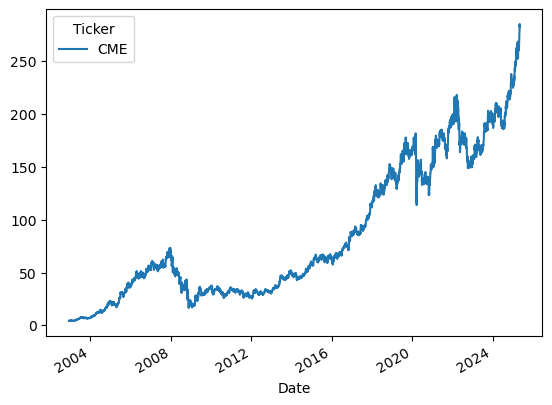

In [57]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [58]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('ME').mean()
goog_downsampled

Ticker,CME
Date,
2002-12-31,4.288577
2003-01-31,4.614071
2003-02-28,4.339828
2003-03-31,4.501435
2003-04-30,4.936251
...,...
2025-01-31,230.846009
2025-02-28,245.529587
2025-03-31,260.352570


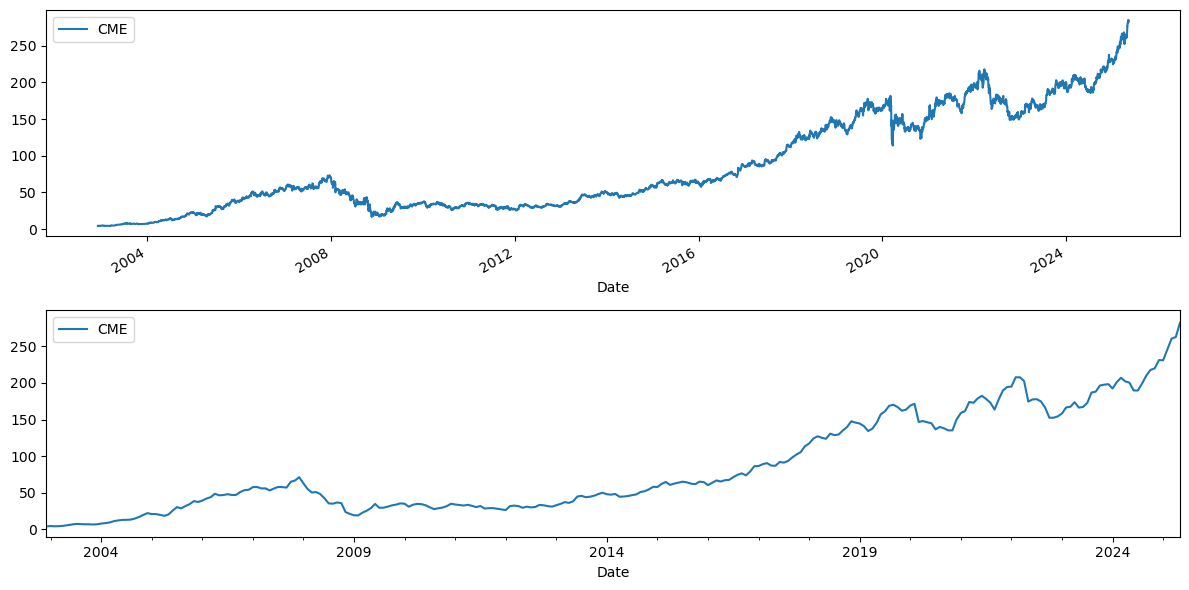

In [59]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

Ticker             CME
Date                  
2002-12-31    4.341869
2003-01-31    4.226509
2003-02-28    4.281206
2003-03-31    4.804309
2003-04-30    5.641443
...                ...
2024-12-31  231.087311
2025-01-31  235.356216
2025-02-28  252.521332
2025-03-31  265.290009
2025-04-30  277.079987

[269 rows x 1 columns]


<Axes: xlabel='Date'>

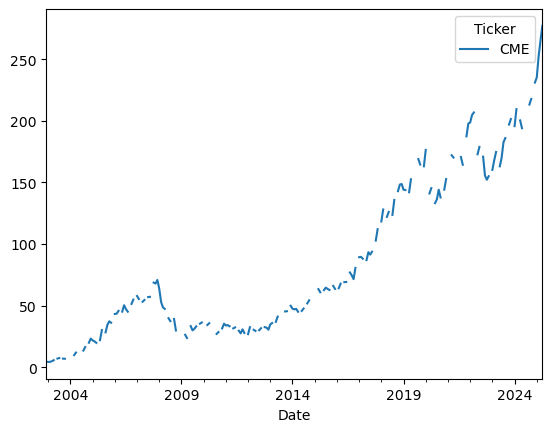

In [60]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('ME')
print(goog_downsampled)

goog_downsampled.plot()

In [61]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12h').mean()
print(goog_upsampled)

Ticker                      CME
Date                           
2002-12-06 00:00:00    4.266289
2002-12-06 12:00:00         NaN
2002-12-07 00:00:00         NaN
2002-12-07 12:00:00         NaN
2002-12-08 00:00:00         NaN
...                         ...
2025-05-07 00:00:00  284.820007
2025-05-07 12:00:00         NaN
2025-05-08 00:00:00  281.989990
2025-05-08 12:00:00         NaN
2025-05-09 00:00:00  284.350006

[16381 rows x 1 columns]


#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [62]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

Ticker,CME
Date,
2002-12-06,NaN
2002-12-09,NaN
2002-12-10,NaN
2002-12-11,NaN
2002-12-12,NaN
...,...
2025-05-05,167.083588
2025-05-06,165.485840
2025-05-07,168.554001


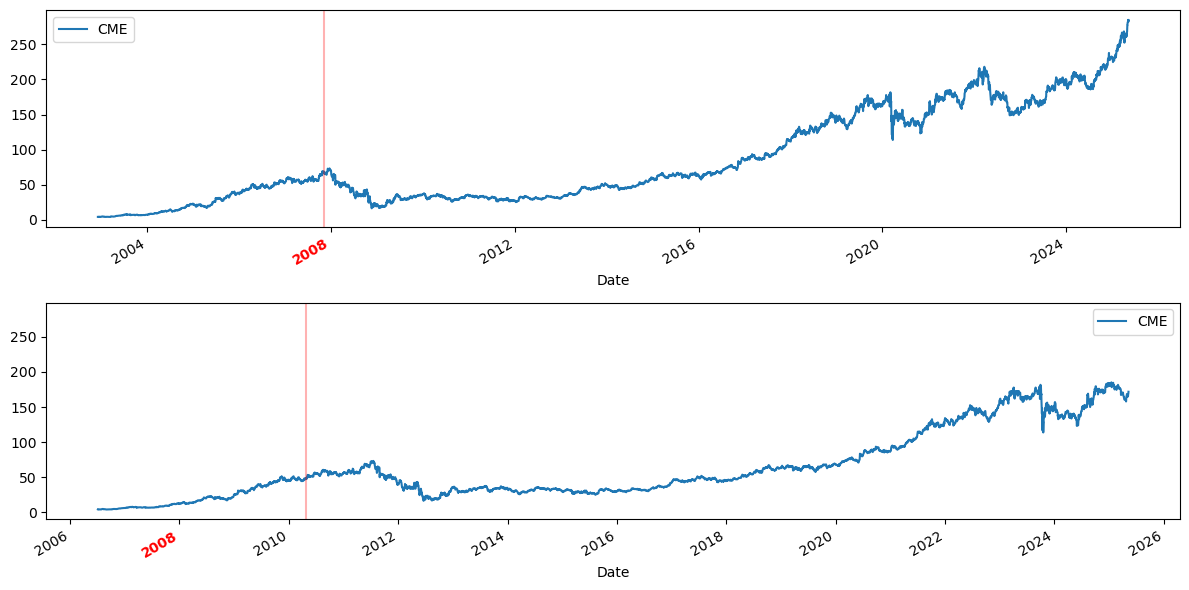

In [63]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [64]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted) / goog_shifted # [+] 주가 변화율 계산

Ticker,CME
Date,
2002-12-06,NaN
2002-12-09,-0.020512
2002-12-10,0.017372
2002-12-11,0.054036
2002-12-12,-0.025522
...,...
2025-05-05,0.007524
2025-05-06,0.001486
2025-05-07,0.006502


Ticker           CME
Date                
2002-12-06       NaN
2002-12-09 -0.087512
2002-12-10  0.072594
2002-12-11  0.229726
2002-12-12 -0.114366
...              ...
2025-05-05  2.109985
2025-05-06  0.420013
2025-05-07  1.839996
2025-05-08 -2.830017
2025-05-09  2.360016

[5642 rows x 1 columns]


<Axes: xlabel='Date'>

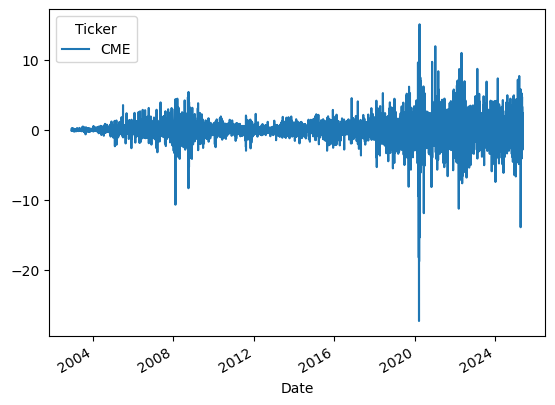

In [65]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog - goog_shifted  # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

Rolling [window=365,center=False,axis=0,method=single]


<Axes: xlabel='Date'>

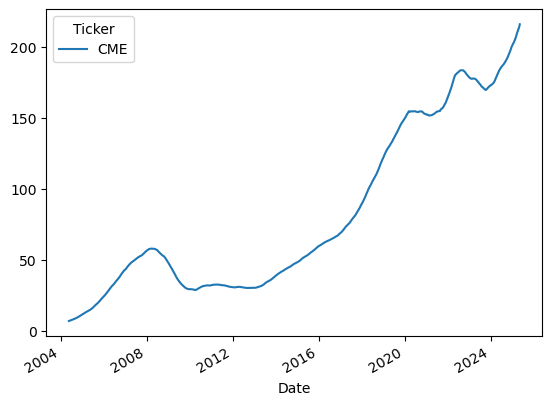

In [77]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

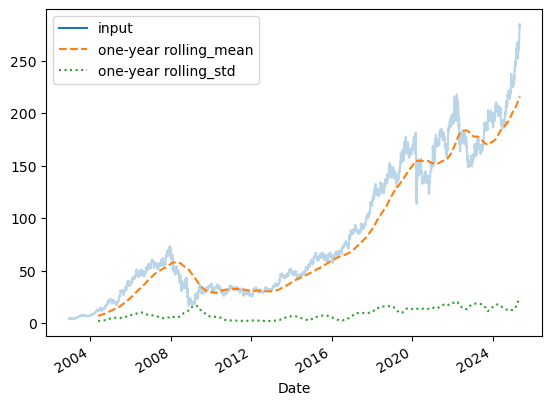

In [78]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)